### 📚 Citation

```bibtex
@misc{tidytuesday,  
  title = {Tidy Tuesday: Big Tech Stock Prices},  
  author = {Evan Gower},  
  url = {https://www.kaggle.com/datasets/evangower/big-tech-stock-prices},  
  year = {2023}  
}

### ⚙️ Setup & Imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('big_tech_stock_prices.csv', on_bad_lines='skip')

### 🧹 Data Exploration & Cleaning

In [15]:
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [16]:
df.tail()

,stock_symbol,date,open,high,low,close,adj_close,volume
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
45087,TSLA,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [17]:
df.columns

Index(['stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close',
       'volume'],
      dtype='object')

In [18]:
df.shape

(45088, 8)

In [19]:
df.describe()

,open,high,low,close,adj_close,volume
count,45088.000000,45088.000000,45088.000000,45088.000000,45088.000000,4.508800e+04
mean,89.266584,90.369825,88.111930,89.271306,85.209631,5.297813e+07
std,101.626955,103.001073,100.124399,101.592916,100.995967,9.324730e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,25.670000,25.930135,25.360001,25.660000,22.076433,9.629425e+06
50%,47.930000,48.459999,47.465000,47.970001,45.377333,2.646315e+07
75%,128.662502,129.848900,127.253945,128.640609,113.672460,5.839768e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.isna().sum()

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

In [24]:
df['stock_symbol'].unique()

array(['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC',
       'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object)

In [23]:
df['date'] = pd.to_datetime(df['date'])

### 📊 Data Visualization

In [51]:
# Create filtered DataFrames
meta_df = df[(df["stock_symbol"] == "META") & (df["date"] >= "2015-01-01")]
apple_df = df[(df["stock_symbol"] == "AAPL") & (df["date"] >= "2015-01-01")]
amzn_df = df[(df["stock_symbol"] == "AMZN") & (df["date"] >= "2015-01-01")]
nflx_df = df[(df["stock_symbol"] == "NFLX") & (df["date"] >= "2015-01-01")]
goog_df = df[(df["stock_symbol"] == "GOOGL") & (df["date"] >= "2015-01-01")]

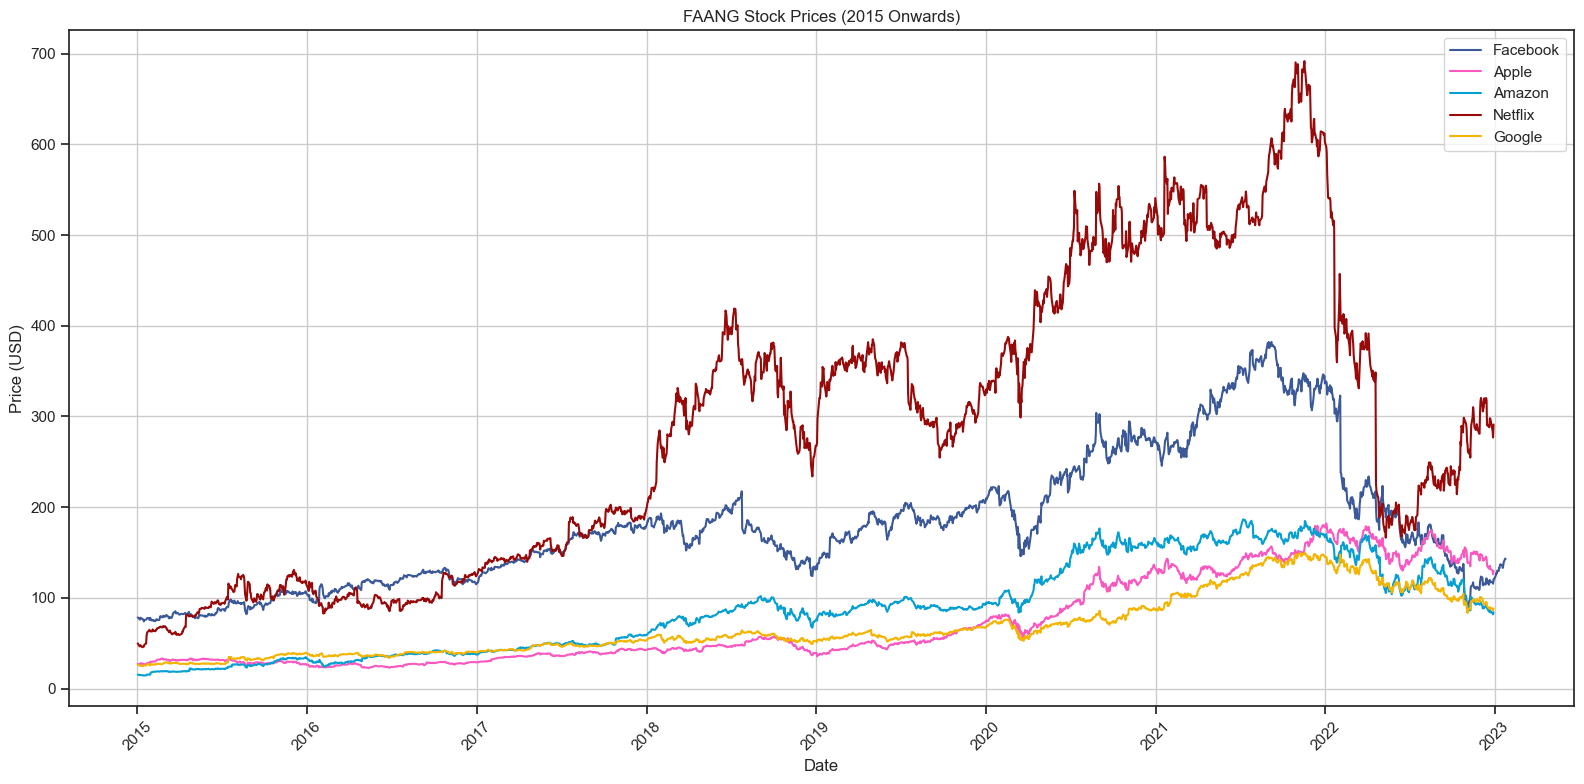

In [ ]:
# Comparision of closing prices of FAANG stocks from 2015 onwards
plt.figure(figsize=(16, 8))
sns.lineplot(data=meta_df, x="date", y="close", label="Facebook", color="#3B5998")
sns.lineplot(data=apple_df, x='date', y='close', label='Apple', color='#FA57C1')
sns.lineplot(data=amzn_df, x="date", y="close", label="Amazon", color="#05A0D1")
sns.lineplot(data=nflx_df, x="date", y="close", label="Netflix", color="#980A0A")
sns.lineplot(data=goog_df, x="date", y="close", label="Google", color="#F4B400")

plt.title('FAANG Stock Prices (2015 Onwards)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()